# Static visualizations

This material describes the most frequently used solutions to produce static plots (e.g. for publications). We focus on:

1. how to use built-in methods of pandas
2. how to customize the plots using the low-level matplotlib library.
3. how to produce some useful high-level plots using the seaborn library.

Note that matplotlib is used internally in approaches 1 and 3 and quite often a combination
is the fastest way to achieve your goals.

*Partly based on the [Lectures on scientific computing with Python](https://github.com/jrjohansson/scientific-python-lectures)
by Robert Johansson (under CC 3.0) and the [Matplotlib tutorial](https://matplotlib.org/3.3.3/tutorials/index.html).*

In [1]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data preparation

For this lesson, we will use a nice dataset consisting of size measurements 
for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.
These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program,
part of the US Long Term Ecological Research Network.

We already know the `pandas` library, so let's use it for data loading:



In [2]:
penguins = pd.read_csv("data/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


And let's a create a slightly growing time series (courtesy of ChatGPT)

In [3]:
# Generate 50 years of data, starting from 1970-01-01
index = pd.date_range("1970-01-01", periods=50, freq="Y")

# Create a pandas Series with random values, starting at 100 and with a slightly growing trend
data = 100 + np.cumsum(np.random.rand(50) - .3) * 20

# Create the time series using the index and data
growing = pd.Series(data, index=index)
growing

1970-12-31    109.151703
1971-12-31    105.559591
1972-12-31    101.405971
1973-12-31    107.061321
1974-12-31    115.553710
1975-12-31    116.730442
1976-12-31    130.597120
1977-12-31    137.185825
1978-12-31    133.658613
1979-12-31    140.205371
1980-12-31    148.089485
1981-12-31    142.988901
1982-12-31    149.208427
1983-12-31    158.895233
1984-12-31    161.871095
1985-12-31    161.338702
1986-12-31    174.265113
1987-12-31    175.836395
1988-12-31    178.626246
1989-12-31    182.962314
1990-12-31    194.328572
1991-12-31    197.878106
1992-12-31    196.036790
1993-12-31    192.804228
1994-12-31    201.829189
1995-12-31    206.776670
1996-12-31    215.896891
1997-12-31    228.465688
1998-12-31    236.176596
1999-12-31    234.354040
2000-12-31    238.661231
2001-12-31    252.010780
2002-12-31    252.722675
2003-12-31    248.659689
2004-12-31    251.525005
2005-12-31    257.566841
2006-12-31    252.734600
2007-12-31    251.578284
2008-12-31    256.579875
2009-12-31    253.880277


## First plots

### In pandas

You may remember that basic plotting of pandas' DataFrames is not difficult; the [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
attribute can be used as a method (where the type of plot is specified by the `kind` parameter) or as a proxy to several submethods (`.plot.scatter`, `.plot.line`, ...):



<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

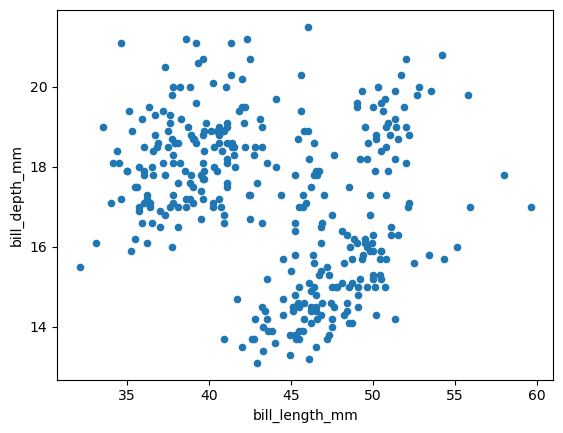

In [4]:
penguins.plot(
    x="bill_length_mm",    # Name of the column for horizontal axis
    y="bill_depth_mm",     # Name of the column for vertical axis
    kind="scatter"
)

Apart from this, pandas offers nine other basic plot types to visualize
one or more variables: 

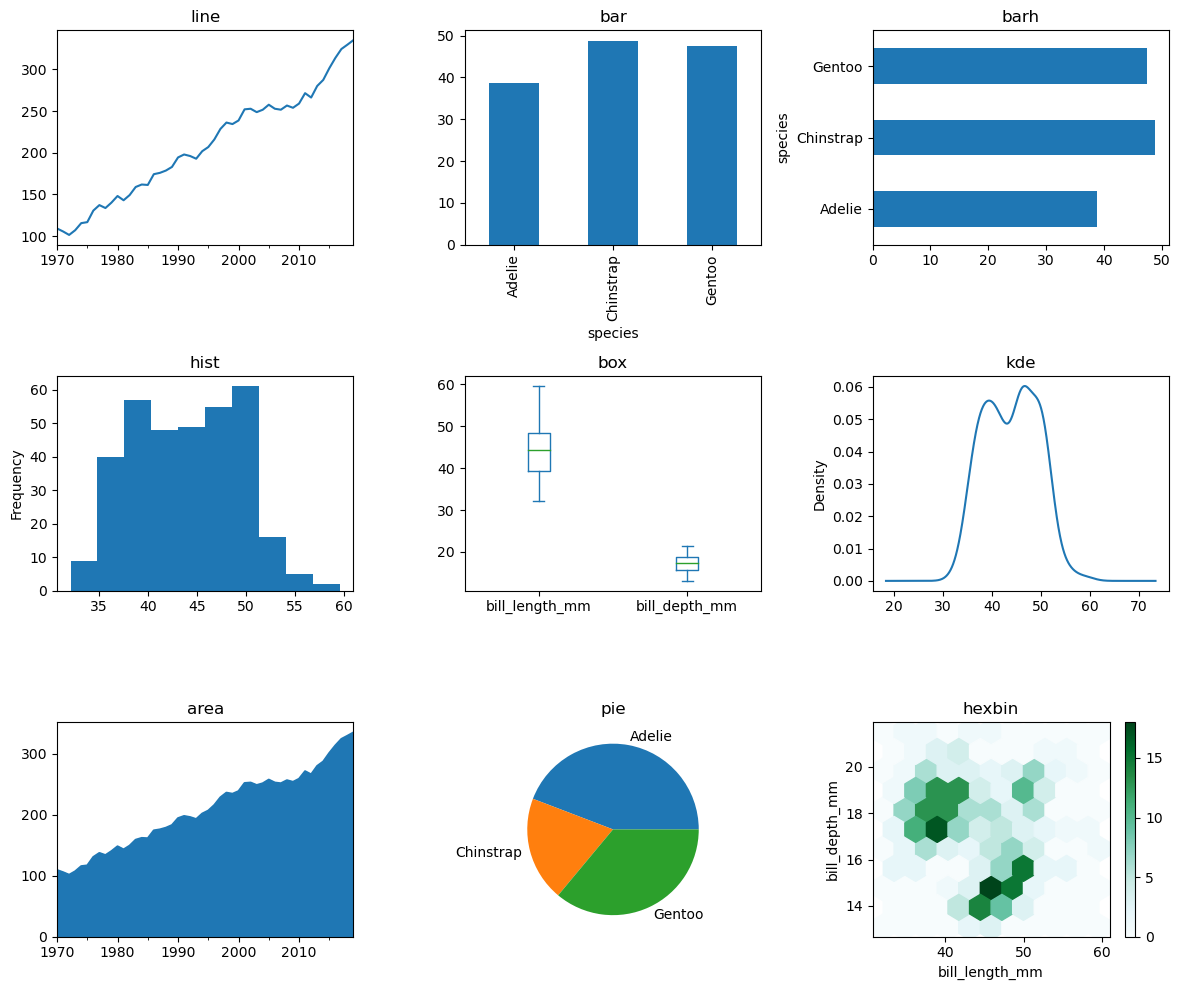

In [5]:
# Prepare a grid for nine plots
fig, ax = plt.subplots(3, 3, figsize=(12, 10))

# Line plot
growing.plot.line(ax=ax[0][0], title="line")

# Bar plot
penguins.groupby("species")["bill_length_mm"].mean().plot.bar(ax=ax[0][1], title="bar")

# Horizontal bar plot
penguins.groupby("species")["bill_length_mm"].mean().plot.barh(ax=ax[0][2], title="barh")

# Histogram (more on that later)
penguins["bill_length_mm"].plot.hist(ax=ax[1][0], title="hist")

# Box plot (more on that later)
penguins[["bill_length_mm", "bill_depth_mm"]].plot.box(ax=ax[1][1], title="box")

# Kernel density estimate plot (more on that later?)
penguins["bill_length_mm"].plot.kde(ax=ax[1][2], title="kde")

# Area plot
growing.plot.area(ax=ax[2][0], title="area")

# Histogram with hexagonal bins (more isotropic)
penguins.plot.hexbin(x="bill_length_mm", y="bill_depth_mm", ax=ax[2][2], gridsize=10, title="hexbin")

# Pie chart
penguins.groupby("species").size().plot.pie(ax=ax[2][1], title="pie")

# Make them fit nicely together
fig.tight_layout()




Various methods offer different arguments that are either used directly or forwarded to the matplotlib backend. As always,
the documentation is an exhaustive source of information and your friend.

For more information about pandas plotting, see the [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) page from the official documentation.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

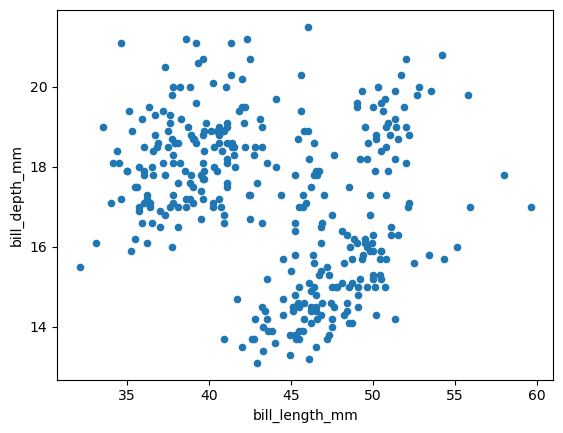

In [6]:
from matplotlib import pyplot as plt   # "plt" is a commonly used alias

fig, ax = plt.subplots()               # Create your drawing area

ax.scatter(
    penguins["bill_length_mm"],        # Not a name, but Series
    penguins["bill_depth_mm"],
    s=20                               # The default circle size differs
)

ax.set_xlabel("bill_length_mm")        # Not taken frEnbterom Series, provide manually
ax.set_ylabel("bill_depth_mm")
ax

Enter...

## Matplotlib

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that makes it highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

Note: In the following, we are using the so called "object-oriented" interface
of Matplotlib. For a discussion on why this is a good choice and how this interface
differs from the other ("pyplot") interface, see the [documentation](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/).

### Basic matplotlib objects

Each plot is composed of a hierarchical structure of low- and high-level
objects, the most important being:

**Figure** - the whole picture (that can contain multiple sub-plots). Usually created via `plt.figure()` or `plt.subplots()`.

**Axes** - (yes, the name is in plural) a usually rectangular area,
part of the figure, described by some coordinate mapping and containing
axes (hence the name), grids, labels, and also points / lines of the plot.


**Line2D, ...** - each of the plot types has its own class. Their instances are parts of the axes.

**Text** - object representing various labels and in-plot text.

![Anatomy](images/mpl-anatomy.png)

(taken from the [Matplotlib tutorial](https://matplotlib.org/3.3.3/tutorials/introductory/usage.html#parts-of-a-figure))

We start by creating the empty figure:

In [7]:
plt.figure();    


<Figure size 640x480 with 0 Axes>

It does not contain anything (precisely "0 Axes") 
so perhaps we can create an `Axes` object here
(already having some visual representation):

<Axes: >

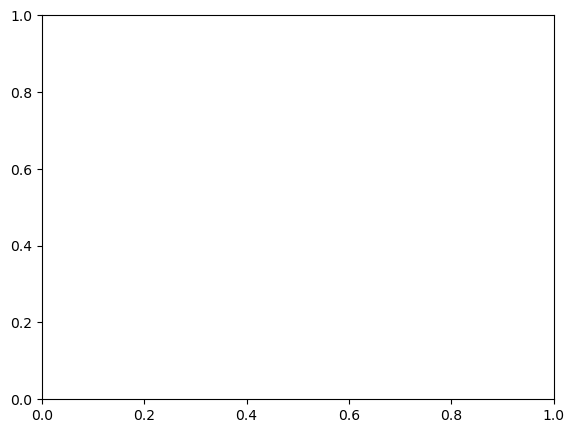

In [8]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # Manually define coords with fig
axes

Unless you are very specific about an unusual arrangement of subplots,
having to specify which part of the image should be occupied by the plot
is a bit unpleasant, so it's usually better to use the `subplots` function
that creates a figure and automatically segments it into 1 to NxM subplot(s):


<Axes: >

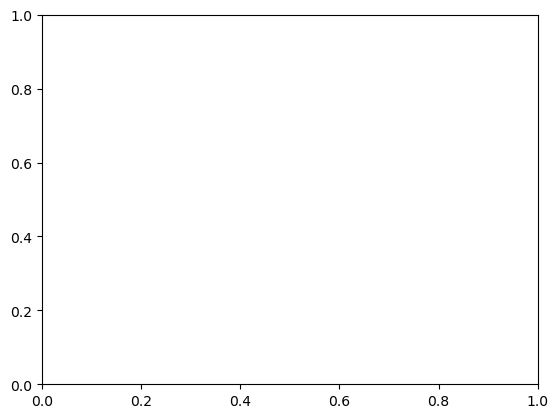

In [9]:
fig, ax = plt.subplots()     # 1x1 Axes objects
ax


array([<Axes: title={'center': 'ax[0]'}>,
       <Axes: title={'center': 'ax[1]'}>], dtype=object)

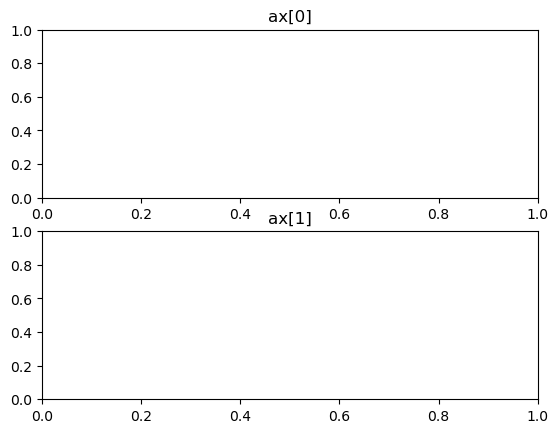

In [10]:
fig, ax = plt.subplots(2)     # 2x1 Axes objects
ax[0].set_title("ax[0]")
ax[1].set_title("ax[1]")
ax

array([<Axes: title={'center': 'ax[0]'}>,
       <Axes: title={'center': 'ax[1]'}>], dtype=object)

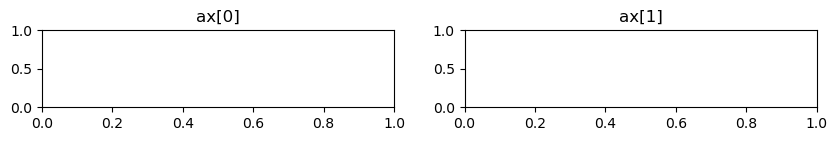

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 1))     # 2x1 Axes objects
ax[0].set_title("ax[0]")
ax[1].set_title("ax[1]")
ax

array([[<Axes: title={'center': 'ax[0][0]'}>,
        <Axes: title={'center': 'ax[0][1]'}>],
       [<Axes: title={'center': 'ax[1][0]'}>,
        <Axes: title={'center': 'ax[1][1]'}>]], dtype=object)

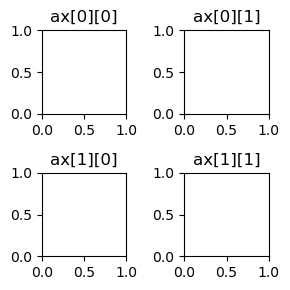

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(3, 3))     # 2x2 Axes objects
ax[0][0].set_title("ax[0][0]")
ax[0][1].set_title("ax[0][1]")
ax[1][0].set_title("ax[1][0]")
ax[1][1].set_title("ax[1][1]")
fig.tight_layout()
ax

To insert a plot in an empty `Axes`, use one of its maaaaaaaannny methods:

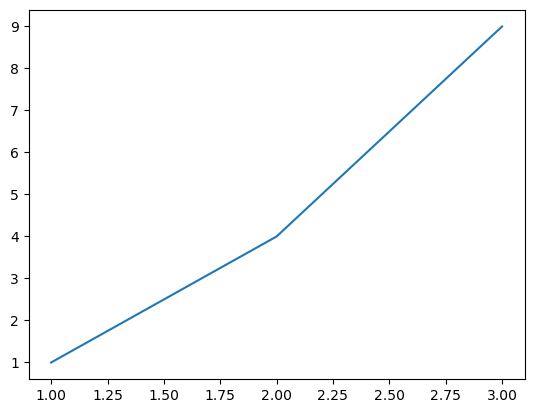

In [13]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [1, 4, 9])

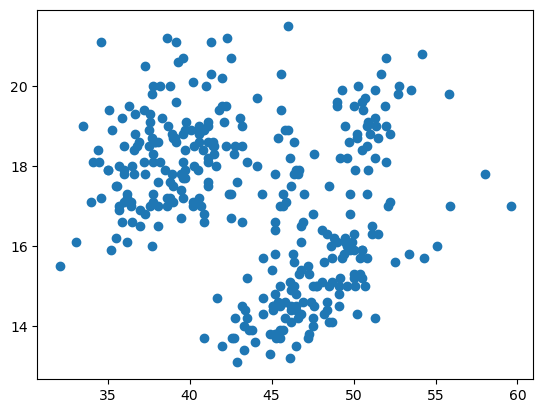

In [14]:
fig, ax = plt.subplots()
ax.scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"])

### Adding titles, labels and legends

Text(0, 0.5, 'You can have LaTeX too: $E \\neq \\frac{mc^2}{\\pi}$')

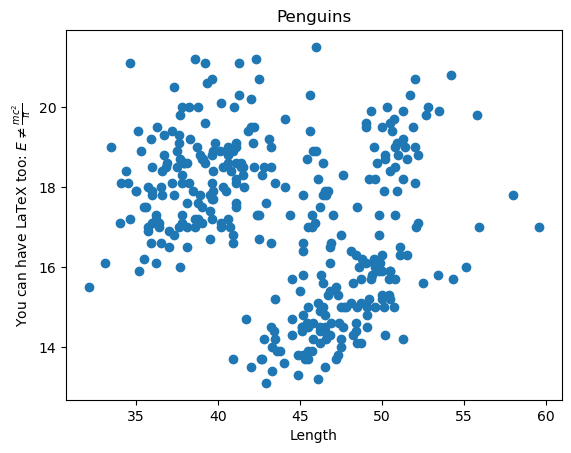

In [15]:
fig, ax = plt.subplots()
ax.scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"])

# The Axes title
ax.set_title("Penguins")

# The axes labels - note the lowercase "a" ;-)
ax.set_xlabel("Length")
ax.set_ylabel(r"You can have LaTeX too: $E \neq \frac{mc^2}{\pi}$")

Let's add a figure with multiple scatter plots (or one with differing
colours - depends on the perspective) and display a legend for it:

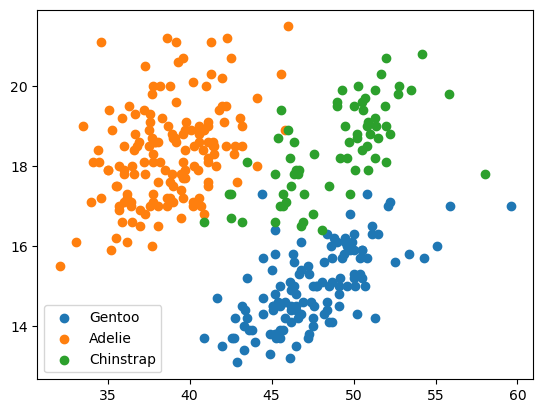

In [16]:
gentoo = penguins.query('species=="Gentoo"')
adelie = penguins.query('species=="Adelie"')
chinstrap = penguins.query('species=="Chinstrap"')

fig, ax = plt.subplots()
ax.scatter(gentoo["bill_length_mm"], gentoo["bill_depth_mm"], label="Gentoo")
ax.scatter(adelie["bill_length_mm"], adelie["bill_depth_mm"], label="Adelie")
ax.scatter(chinstrap["bill_length_mm"], chinstrap["bill_depth_mm"], label="Chinstrap")

ax.legend()


### Controling the axes

For each `Axes` object, we can control the ranges available on both axes
using the [`set_xlim`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)
and [`set_ylim`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylim.html) methods:

(0.0, 21.92)

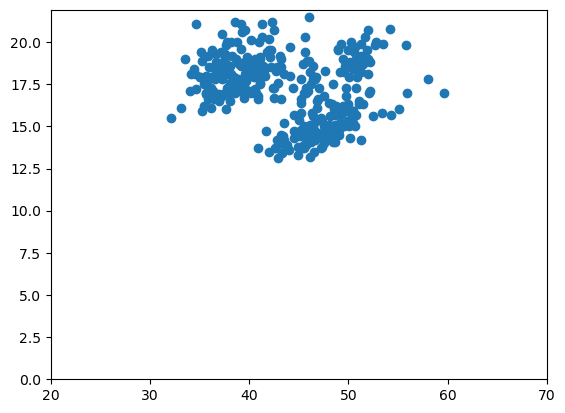

In [17]:
fig, ax = plt.subplots()
ax.scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"])

ax.set_xlim(20, 70)
ax.set_ylim(0, None)   # The max range in 

We can customize the ticks on each axis (using [`set_xticks`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)
 and [`set_yticks`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)):

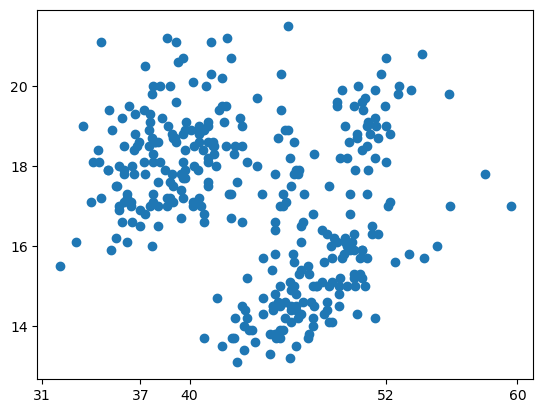

In [18]:
fig, ax = plt.subplots()
ax.scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"])
ax.set_xticks([31, 37, 40, 52, 60])

Including the labels to display (using [`set_xticklabels`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.set_xticklabels.html)):

[Text(31, 0, 'about thirty'),
 Text(47, 0, 'more than 40'),
 Text(60, 0, 'sixty is cool')]

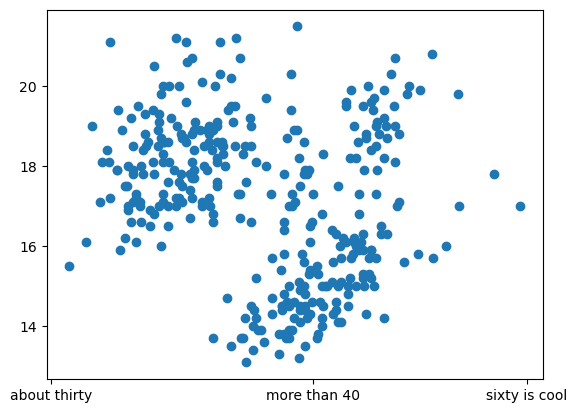

In [19]:
fig, ax = plt.subplots()
ax.scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"])
ax.set_xticks([31, 47, 60])
ax.set_xticklabels(["about thirty", "more than 40", "sixty is cool"])

If the range spans a few orders of magnitude, it is usually better
to use logarithmic scale (in one or both axes using the [`set_xscale`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.set_xscale.html)
 and [`set_yscale`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.set_yscale.html) methods).

*Note that pandas plotting method accept `logx=True` argument.*

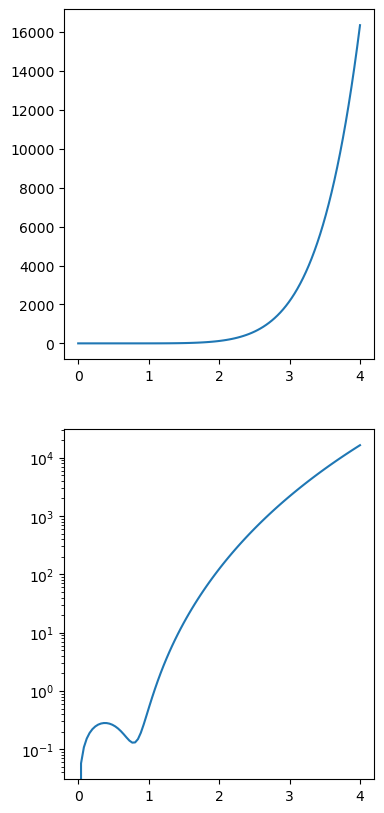

In [20]:
fig, ax = plt.subplots(2, figsize=(4, 10))
x = np.linspace(0, 4, 100)
y = x ** 7 - 2 * x ** 2 + 1.5 * x

ax[0].plot(x, y)

ax[1].plot(x, y)
ax[1].set_yscale("log")

You may also add a grid (using the [`grid`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.grid.html) method):

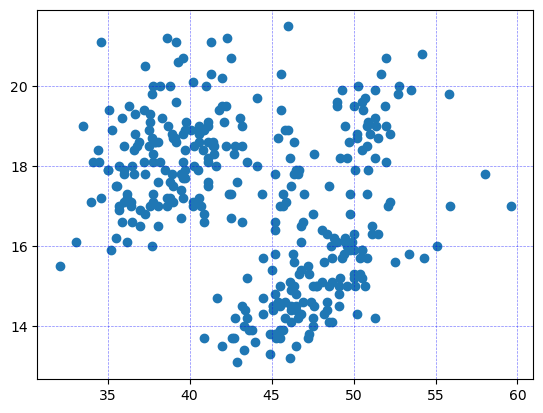

In [21]:
fig, ax = plt.subplots()
ax.scatter(
    penguins["bill_length_mm"],
    penguins["bill_depth_mm"]
)
ax.grid(
    color='b',
    alpha=0.5,
    linestyle='dashed',
    linewidth=0.5)

### A bit of styling

Most of the plotting methods have many options to further specify the
properties of lines / points / ... See the documentation and examples for
more details.

Some of the interesting universal parameters:

- `alpha` for non-transparency of most objects

Some of the interesting parameters for [line plots](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.plot.html):
- `color` for line color (or objects with different plot types)
- `linewidth` or `lw` as line width for line plots
- `linestyle` or `ls` as line style
- `marker` as marker style
- `markersize` for size of the points 
- `markerfacecolor` - color of the marker interior
- `markeredgewidth` - width of the marker interior
- `markeredgecolor` - color of the marker border
- `markersize` for size of the points 


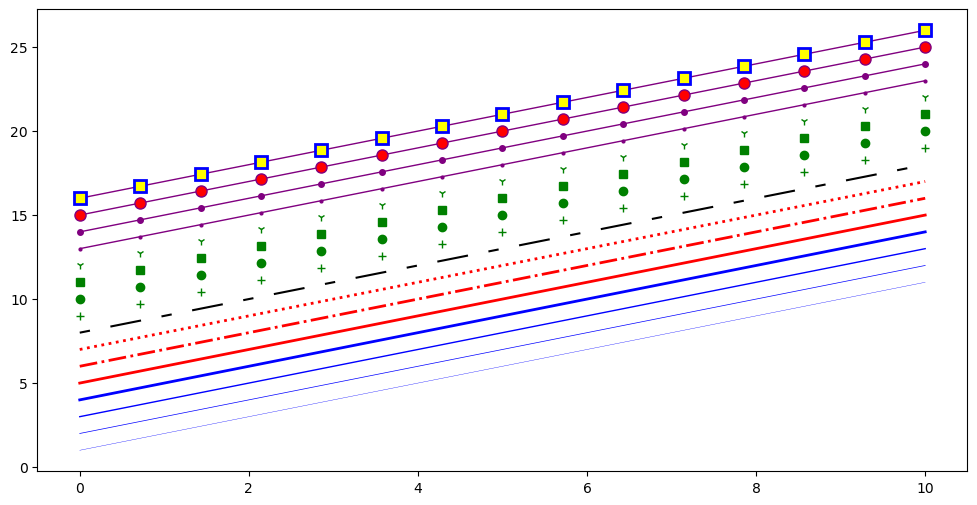

In [22]:
fig, ax = plt.subplots(figsize=(12,6))

x = np.linspace(0, 10, 15)

# Line width
ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# Line styles ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# Custom line styles
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# Marker types: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='', marker='1')

# Marker sizes and colors
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

Some of the interesting parameters for [scatter plots](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.scatter.html):
- `c` for the color
- `s` for the size
- `marker` for the marker style
- `linewidth` for the border width
- `edgecolors`

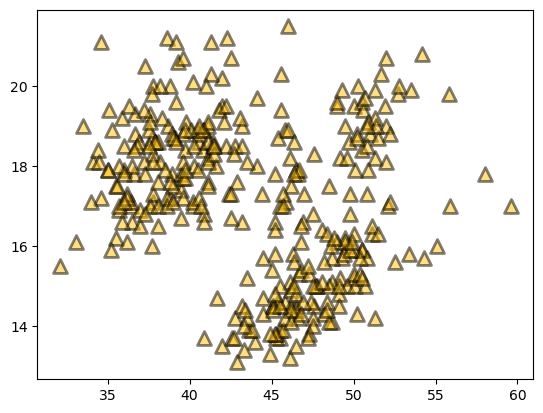

In [23]:
fig, ax = plt.subplots()
ax.scatter(
    penguins["bill_length_mm"],
    penguins["bill_depth_mm"],
    s=100,
    c="#ffc000",
    marker="^",
    edgecolors="black",
    linewidth=2,
    alpha=0.5
)

### Text formatting

When you want to change some aspects of the text you are adding, use 
the keyword arguments like `family` (a.k.a font name), `weight` (bold or not), `fontsize` (in pt) and `style` (italic or not):

Text(0.5, 1.0, 'serif (+ italic)')

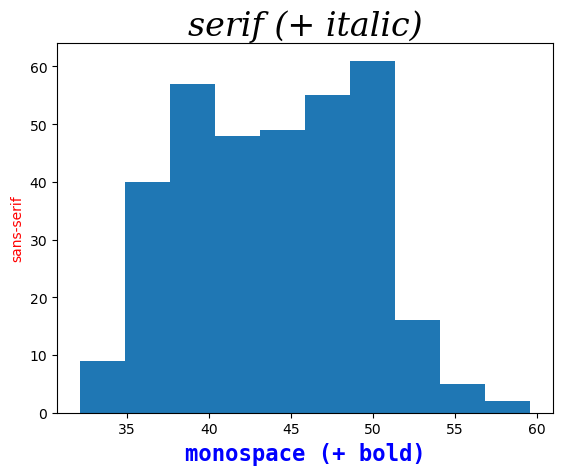

In [24]:
fig, ax = plt.subplots()

ax.hist(penguins["bill_length_mm"])
ax.set_xlabel(
    "monospace (+ bold)", family="monospace", fontsize=16, weight="bold", color="blue"
)
ax.set_ylabel("sans-serif", family="sans-serif", fontsize=10, color="red")
ax.set_title("serif (+ italic)", family="serif", fontsize=24, style="italic")


It might be tiresome to specify all these parameters at all times, so perhaps
it's better to configure matplotlib with some default values:

In [25]:
# matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

Note that the way matplotlib looks for fonts is a bit magical and selecting
a font by name may or may not work on your computer. It's usually safe to stick
to generic types like "serif", "sans-serif" or "monospace".

### Colour maps, heat maps and contours

When you are creating two-dimensional plots of regularly-spaced values,
you may use 
[`pcolor`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.pcolor.html), 
[`imshow`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.imshow.html) and 
[`contour`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.contour.html) methods.

In [26]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)

alpha = 0.7
phi_ext = 2 * np.pi * 0.5
Z = 2 + alpha - 2 * np.cos(Y) * np.cos(X) - alpha * np.cos(phi_ext - 2*Y).T

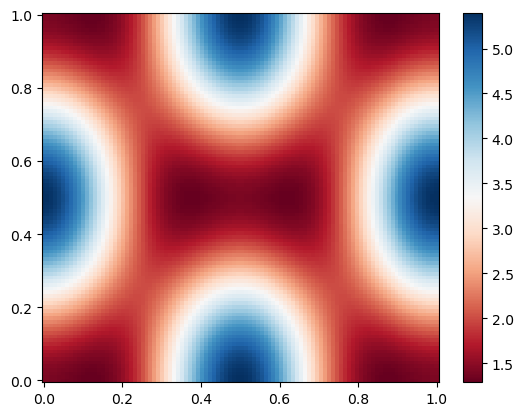

In [27]:
import matplotlib

fig, ax = plt.subplots()

p = ax.pcolor(
    X / (2 * np.pi),
    Y / (2 * np.pi),
    Z,
    cmap=matplotlib.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
)
cb = fig.colorbar(p, ax=ax)


Here we are using a red-blue colormap. A long treatise on colour maps can be found in the [documentation](https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html).

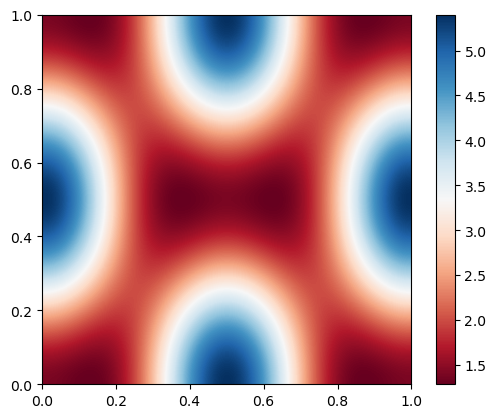

In [28]:
fig, ax = plt.subplots()

im = ax.imshow(
    Z,
    cmap=matplotlib.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
    extent=[0, 1, 0, 1],
)
im.set_interpolation("bilinear")

cb = fig.colorbar(im, ax=ax)


Actually, you see that imshow and pcolor do a similar thing. They differ in two main aspects:

- imshow is faster (using a bitmap)
- pcolor can display non-regular grids

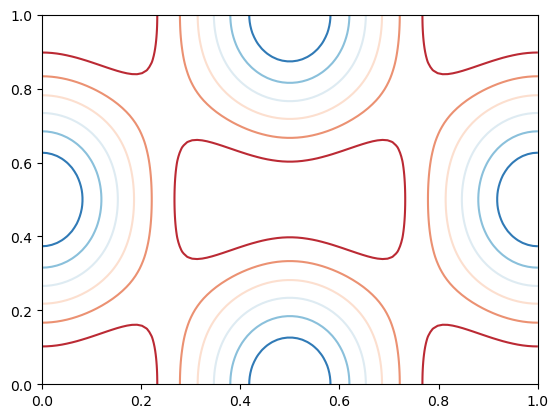

In [29]:
fig, ax = plt.subplots()

cnt = ax.contour(
    Z,
    cmap=matplotlib.cm.RdBu,
    vmin=abs(Z).min(),
    vmax=abs(Z).max(),
    extent=[0, 1, 0, 1],
)


Note that when you are interested of distribution of several values in two coordinates
(like penguins fitting into bill length vs. depth bin), you probably want 
a **2D histogram** (using [`hist2d`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.hist2d.html)):

(array([[ 0.,  0.,  1.,  1.,  2.,  1.,  1.,  1.,  0.,  1.],
        [ 0.,  0.,  0.,  3., 11., 12.,  7.,  5.,  1.,  0.],
        [ 0.,  0.,  0.,  1., 11., 14., 14.,  7.,  5.,  3.],
        [ 5.,  2.,  0.,  0.,  5.,  8., 15.,  7.,  2.,  3.],
        [12., 12.,  4.,  2.,  4.,  5.,  3.,  4.,  1.,  0.],
        [ 3., 15., 15.,  4.,  4.,  7.,  4.,  0.,  0.,  1.],
        [ 0.,  4., 11., 18.,  2.,  4.,  9., 10.,  3.,  0.],
        [ 0.,  0.,  1.,  2.,  2.,  1.,  2.,  4.,  3.,  1.],
        [ 0.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.]]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]),
 <matplotlib.collections.QuadMesh at 0x1ff008a5cc0>)

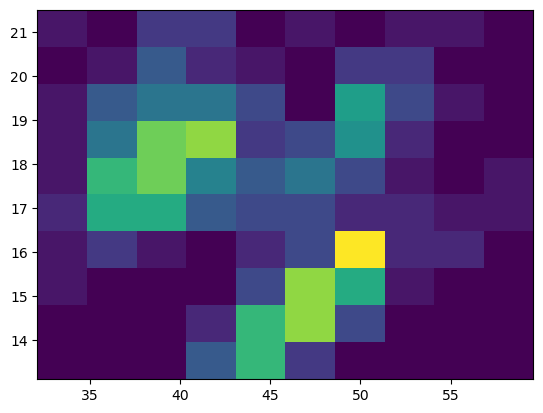

In [30]:
fig, ax = plt.subplots()

penguins_na = penguins.dropna()
ax.hist2d(penguins_na.bill_length_mm, penguins_na.bill_depth_mm)

### Workflow for an occasional matplotlib user (like myself)

1. Prepare the data.
2. Go to the matplotlib [gallery of examples](https://matplotlib.org/3.3.3/gallery/index.html).
3. Find the example solving a goal similar to mine.
4. Take its code and adapt (usually) strip to my needs.

If I am still stuck at this point, I read documentation on each function.

## (Very brief and optional) seaborn introduction

Seaborn is a high-level library targeted at statistical visualizations. It is (no surprise)
based on matplotlib and it plays well with pandas (just pass the
dataframe as `data=...` argument and than you can use columnd names for various
properties of the visualization.)

For a glimpse of seaborn can do, go to seaborn [gallery of examples](https://seaborn.pydata.org/examples/index.html)
and its documentation in general.

Here we present only a few examples (actually taken from the documentation).

In [31]:
import seaborn as sns    # `sns` being the common alias

There are the usual [scatter plots](https://seaborn.pydata.org/generated/seaborn.scatterplot.html),
[line plots](https://seaborn.pydata.org/generated/seaborn.lineplot.html), ... in seaborn:

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

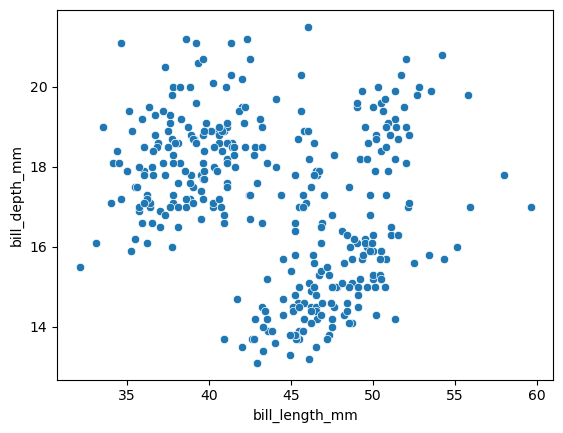

In [32]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

There are also plots to explore the distributions (like [histograms](https://seaborn.pydata.org/generated/seaborn.histplot.html),
[box plots](https://seaborn.pydata.org/generated/seaborn.boxplot.html),
[violin plots](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
 and [kde plots](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)):

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

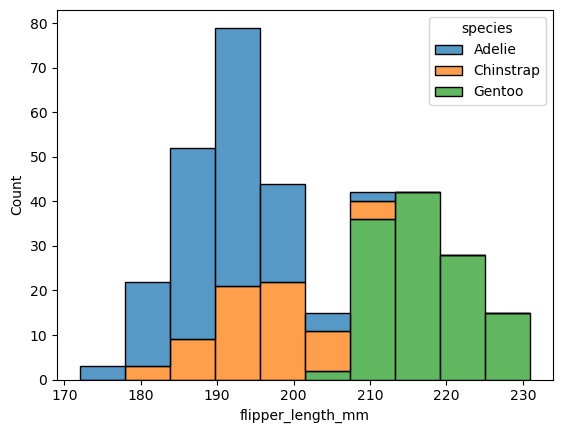

In [33]:
sns.histplot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    multiple="stack"
)


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

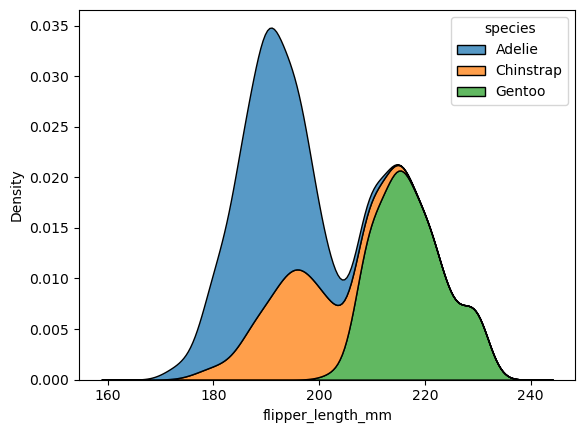

In [34]:
sns.kdeplot(
    data=penguins,
    x="flipper_length_mm",
    hue="species",
    multiple="stack"
)


<Axes: xlabel='species', ylabel='flipper_length_mm'>

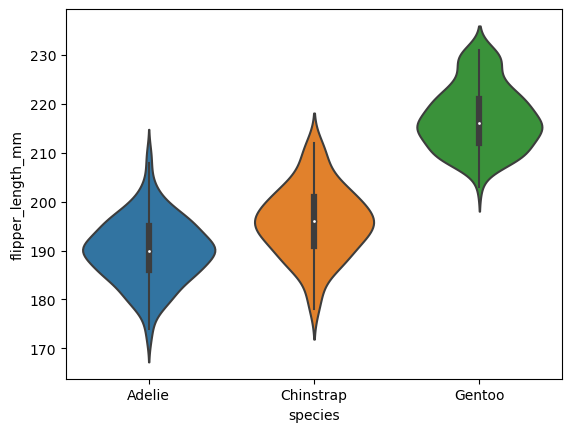

In [35]:
sns.violinplot(
    data=penguins,
    x="species",
    y="flipper_length_mm",
)

What seaborn is really good at, is combining several subplots of the same
or different type in a grid that is automatically laid out for you:

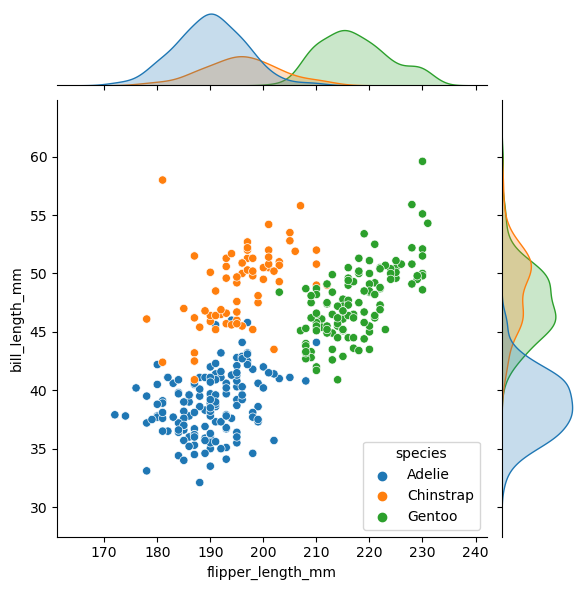

In [36]:
sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species")

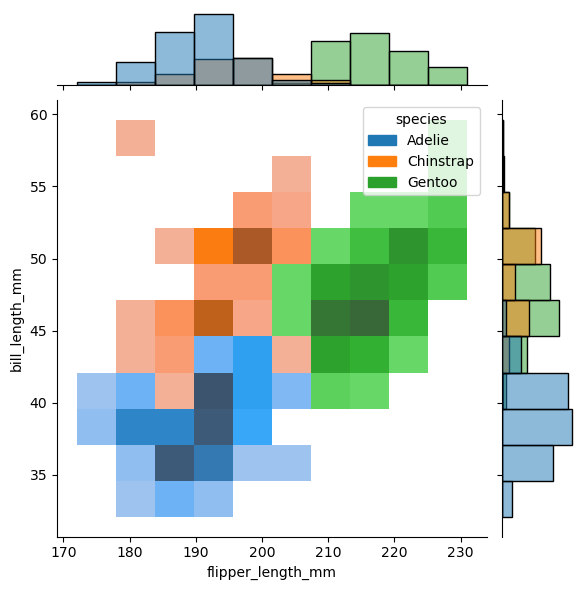

In [37]:
sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species",
    kind="hist"
)

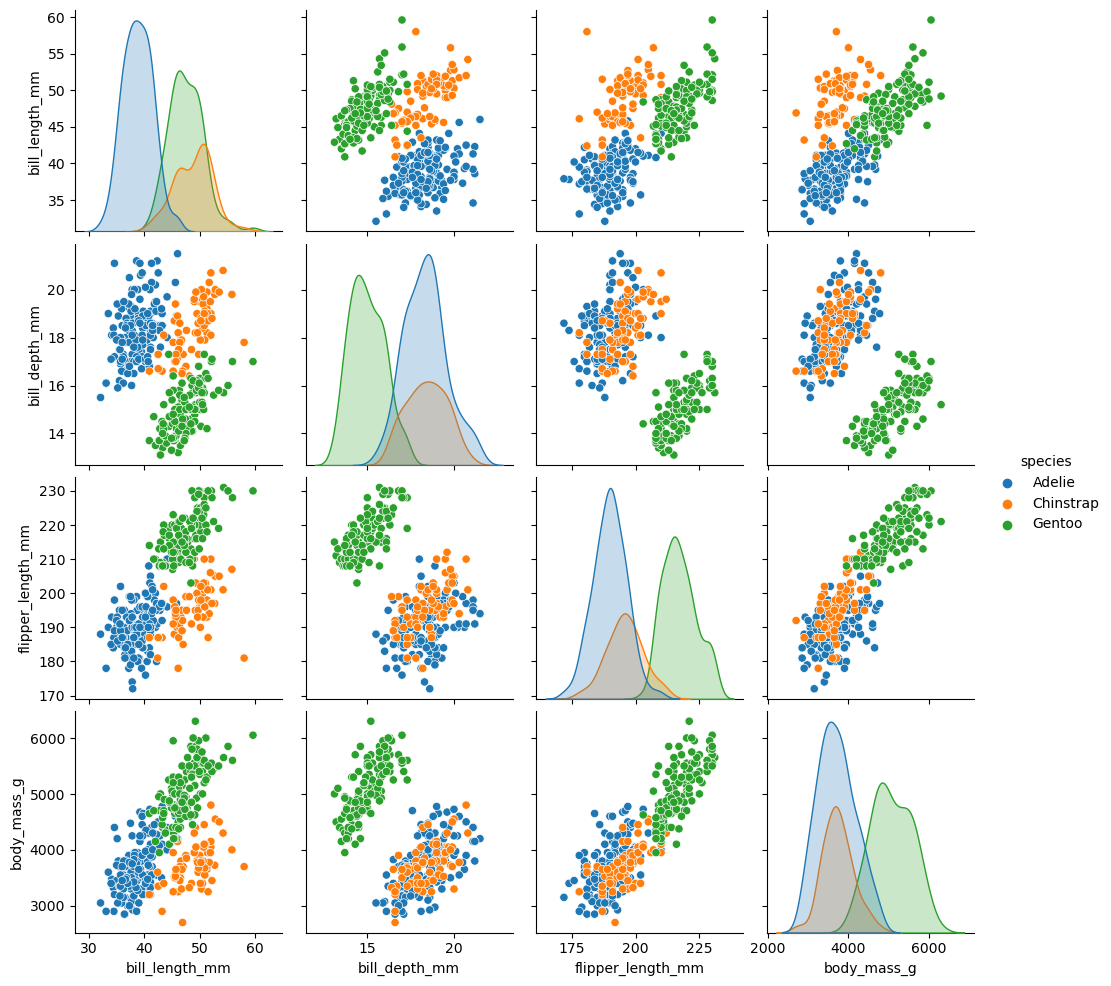

In [38]:
sns.pairplot(data=penguins, hue="species")

## Exporting a plot

Until now, all the plots were created by the matplotlib engine in the memory and displayed in the Jupyter (or deepnote)
notebook using the special treatment of `Figure` instances. But what if we want to save the plot? *Poor man's solution
is right-click and "Copy image" but of course, this of course is not ideal from many points of view...*

The following procedure works for matplotlib, pandas, and seaborn alike:

1. Obtain the `Figure` instance of interest.

    ```
    fig = ...
    ```

2. Ideally, force its reformatting to fit in the export frame.

    ```
    fig.tight_layout()
    ```

3. Call the [`savefig`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig) method with the filename (format should be deduced) and optionally several arguments.

    ```
    fig.savefig("plot.png", ...args)
    ```

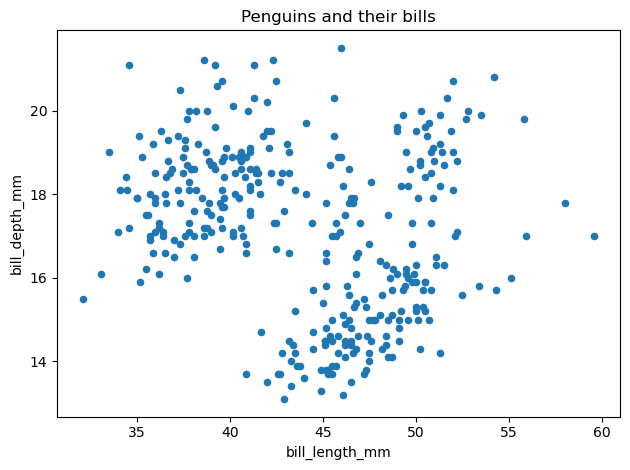

In [39]:
ax = penguins.plot(
    x="bill_length_mm",    # Name of the column for horizontal axis
    y="bill_depth_mm",     # Name of the column for vertical axis
    kind="scatter"
)
ax.set_title("Penguins and their bills")

# 1. plot returns axis => get its figure
fig = ax.figure

# 2. Call tight layout
fig.tight_layout()

# 3. 
fig.savefig("penguins.png", dpi=300)  # Higher resolution

fig.savefig("penguins.pdf")
fig.savefig("penguins.svg")


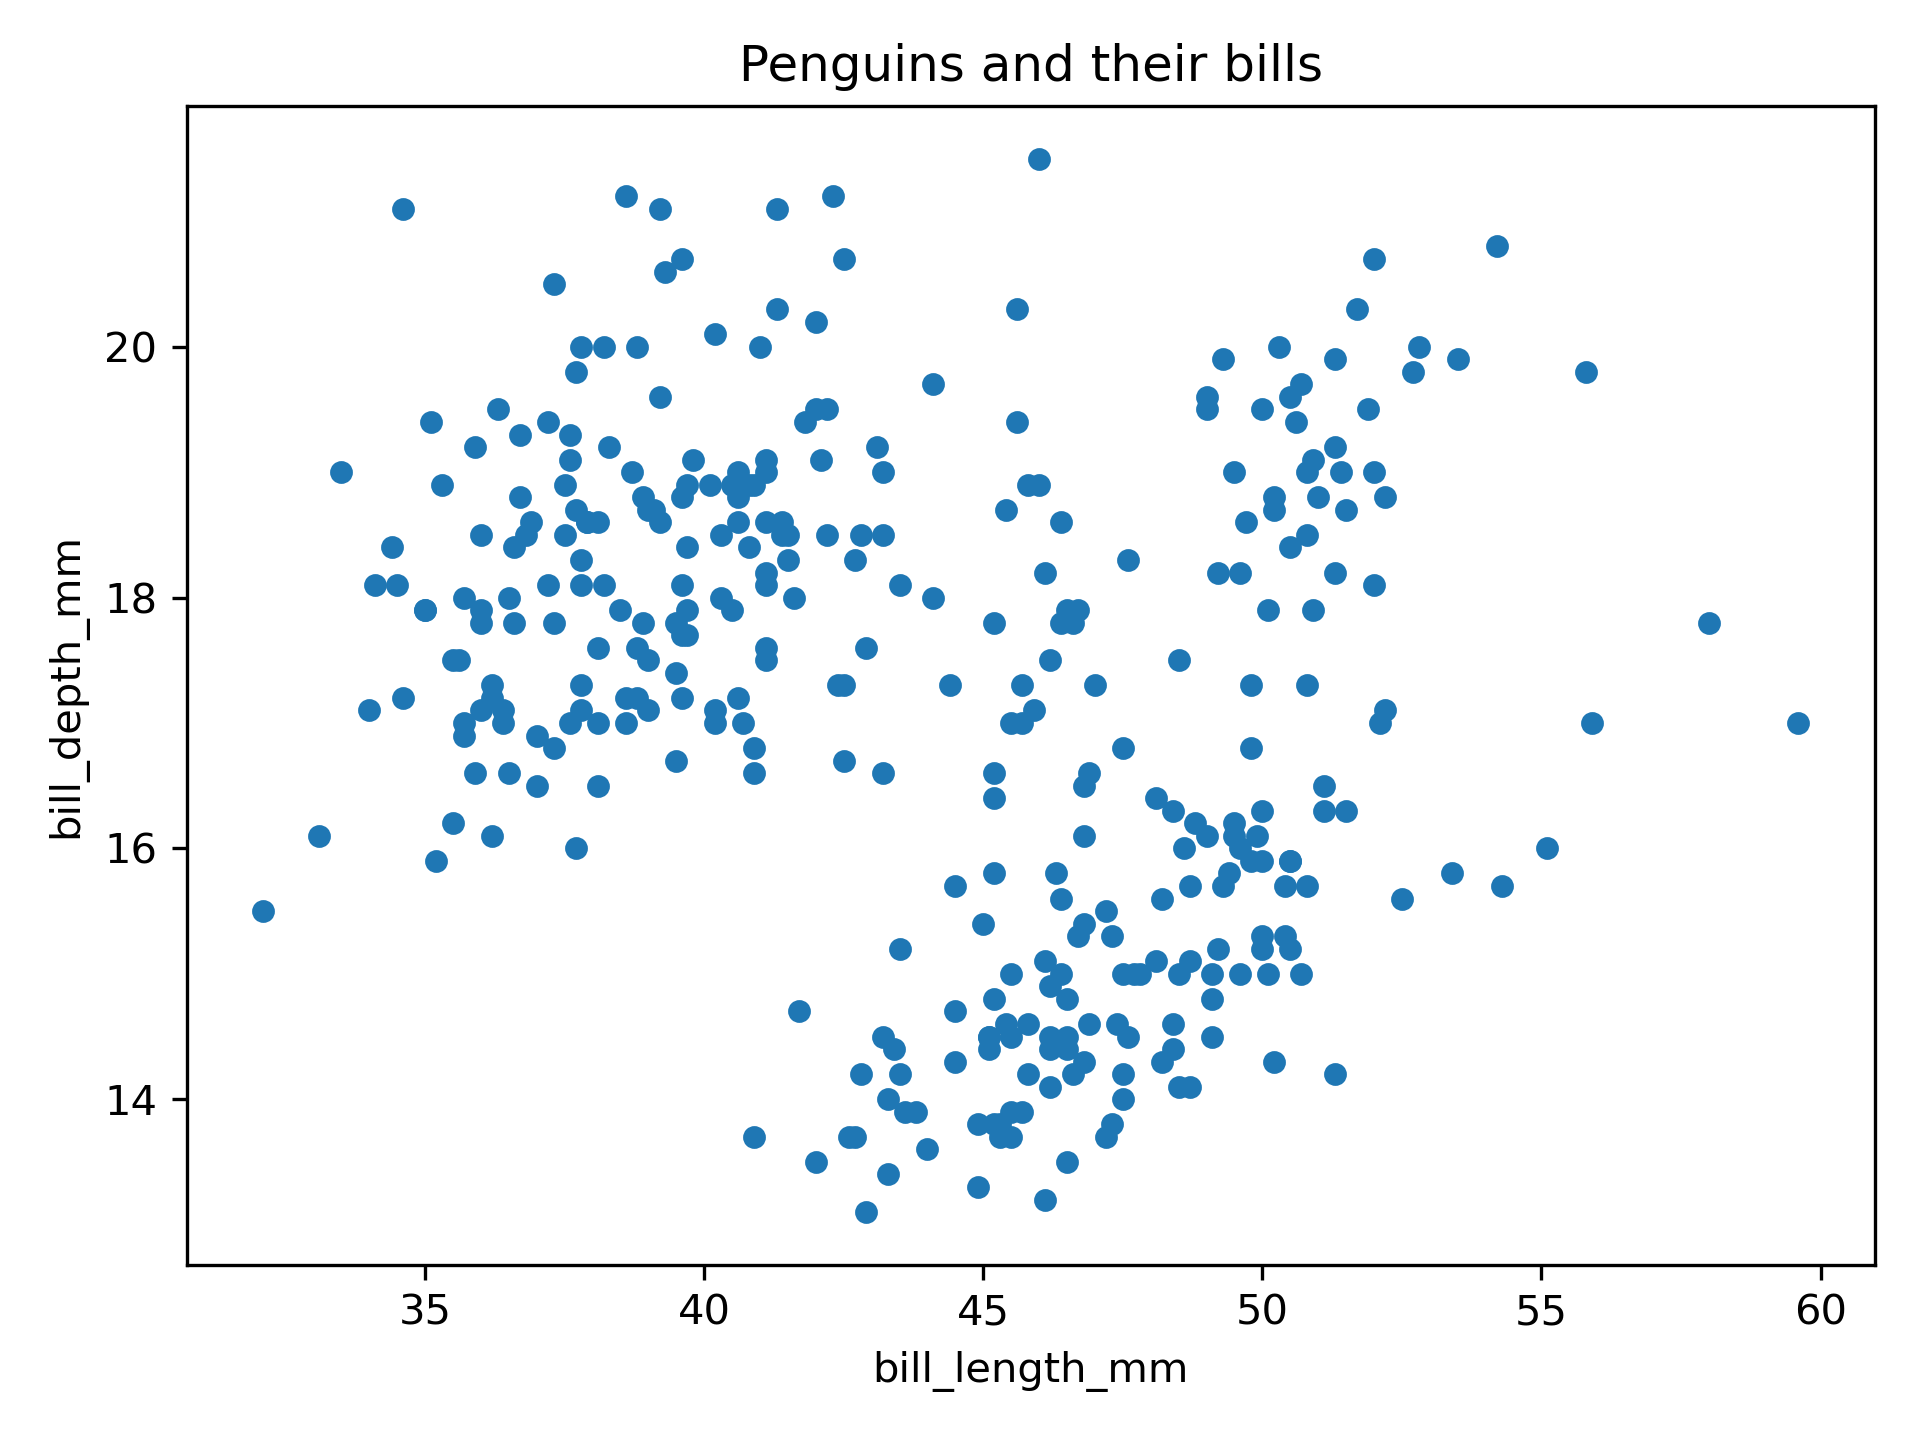

In [40]:
from IPython.display import Image

Image("penguins.png")

You will probably want the PNG or SVG format for the web and PDF for publishing.

## What was not covered

(among others...)

- advanced plots in pandas
- many plot types in all three libraries
- interactive plots in matplotlib (less important nowadays)
- text annotations for data points
- adding custom graphical objects and images in the plots
- twin axes in matplotlib
- animations in matplotlib

## Further reading and videos

- [Matplotlib examples](https://matplotlib.org/gallery/index.html)
- [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)

The Matplotlib cheatsheet:

![Picture title](images/mpl_cheatsheet.png)

(from https://github.com/rougier/matplotlib-cheatsheet by Nicolas Rougier)